## An easy way to guarantee the quality of your data



In this series, we'll delve into the world of data analytics and explore real-world scenarios to learn how data quality plays a pivotal role in making informed decisions. Today, we start with the fundamental question: What is data quality and why does it matter?

"Data quality is defined as data's dependability, accuracy, consistency, and completeness."

Consider your data to be the foundation of a building. High data quality ensures the trustworthiness of your insights and judgements, much as a good foundation provides the durability of a construction. Poor data quality can lead to incorrect conclusions, ill-advised initiatives, and missed opportunities.



Let's have a practice to identify your data quality, Here is a sample case study you may consider to learn.
Case Study: Data of Mall Customers

### Scenario:
Imagine you are working for a shopping mall and have access to a dataset containing customer information, including CustomerID, Gender, Age, Annual Income, and Spending Score. Your task is to perform a comprehensive analysis to better understand your customers and tailor your marketing strategies accordingly. However, the dataset has some issues that need to be addressed.

### Problem: 
Upon inspecting the dataset, you discover several data quality challenges:
- Missing Values: Some rows in the dataset have missing values, particularly in the Annual Income column.
- Duplicate Entries: The dataset contains duplicate customer entries, which can skew your analysis.
- Outliers: There appear to be outliers in the Spending Score column that might affect your segmentation.

To address these challenges and ensure the quality of your analysis, you follow these steps:
- Data Profiling: Using Python, you perform data profiling on the dataset. You calculate summary statistics for each column, including mean, median, and standard deviation. Additionally, you identify the percentage of missing values in the Annual Income column and explore the distribution of data points in the Age and Spending Score columns.
- Data Cleaning: Armed with insights from data profiling, you start cleaning the dataset. You handle missing values in the Annual Income column by imputing them with the median value. To deal with duplicate entries, you remove any repeated CustomerID records. To address outliers in the Spending Score column, you apply appropriate outlier detection and handling techniques.

## Library

In [1]:
import pandas as pd
import numpy as np

## Load dataset

In [2]:
data = pd.read_csv("Mall_Customers_uncleaned.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,4,Female,23.0,16.0,77.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              204 non-null    int64  
 1   Gender                  204 non-null    object 
 2   Age                     202 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.1+ KB


## Check missing value

In [4]:
#check missing value
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       2
Annual Income (k$)        4
Spending Score (1-100)    4
dtype: int64

as we can see that feature Age, Annual Income, and Spending Score have missing value, there are two option we can use to clean the data
1. Remove the missing value, in this case, the value should be under your threshold, for example you can remove the null if the null have under 5%.
2. Filling the missing value by using mean or median of the data.

for this case, I want to fill the null by using median

In [5]:
# Calculate the median of each column
age_median = data['Age'].median()
income_median = data['Annual Income (k$)'].median()
score_median = data['Spending Score (1-100)'].median()

# Fill missing values with medians
data['Age'].fillna(age_median, inplace=True)
data['Annual Income (k$)'].fillna(income_median, inplace=True)
data['Spending Score (1-100)'].fillna(score_median, inplace=True)

# Check if there are any more missing values
missing_values = data.isnull().sum()

In [6]:
missing_values 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Check duplicated value

In [7]:
data.duplicated().sum()

4

as you can see, we identified duplicated value, so we need to remove the dupicated data

In [8]:
# Remove duplicated rows
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

## Check inconsistency

In [10]:
data['Gender'].describe()

count        200
unique         4
top       Female
freq         111
Name: Gender, dtype: object

In [12]:
data['Gender'].unique()

array(['Male', 'Female', '0', '1'], dtype=object)

In [14]:
# Removing inconsistent values
valid_genders = ['Male', 'Female']
cleaned_data = data[data['Gender'].isin(valid_genders)]
cleaned_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
6,5,Female,31.0,17.0,40.0
...,...,...,...,...,...
199,196,Female,35.0,120.0,79.0
200,197,Female,45.0,126.0,28.0
201,198,Male,32.0,126.0,74.0
202,199,Male,32.0,137.0,18.0


In [15]:
cleaned_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## Check outlier

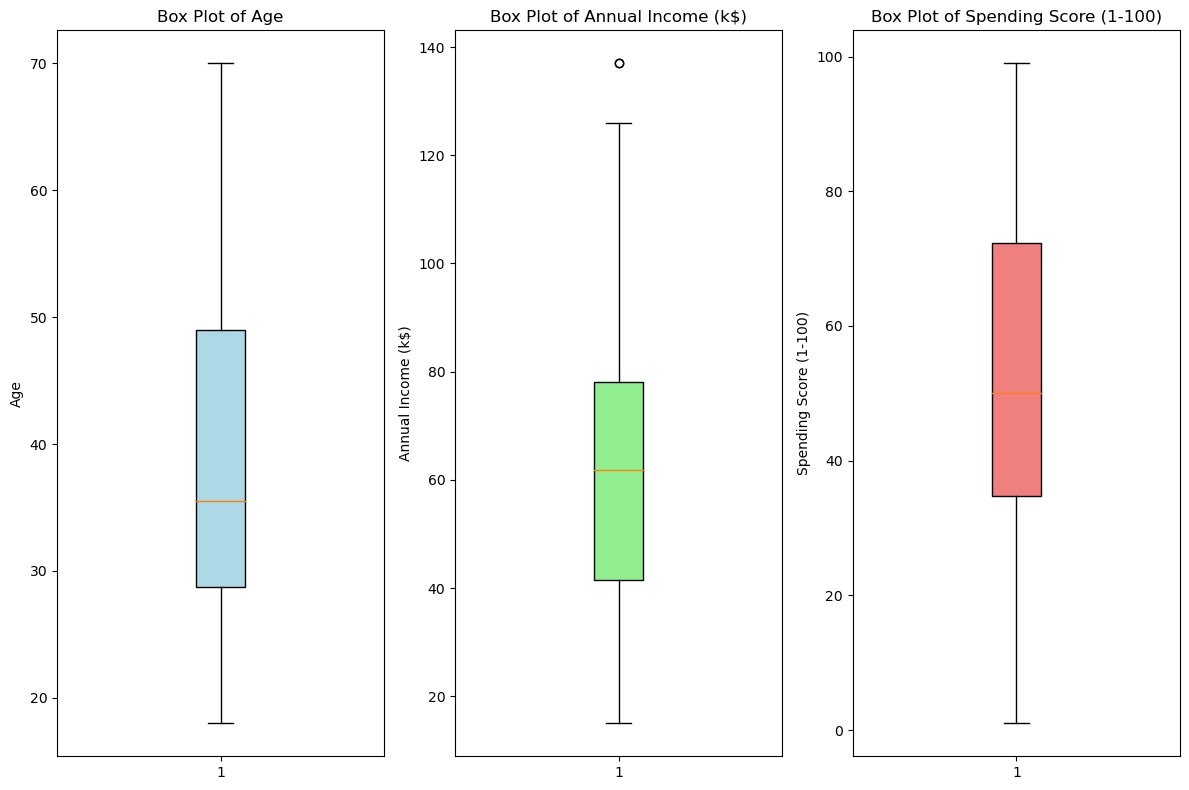

In [17]:
import matplotlib.pyplot as plt

# Select only the numerical columns for outlier analysis
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Set up a color palette for the box plots
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
for idx, column in enumerate(numerical_columns):
    plt.subplot(1, 3, idx + 1)
    plt.boxplot(data[column], patch_artist=True, boxprops=dict(facecolor=colors[idx]))
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

After identifying outlier, now we need to remove the outlier by using Interquartile Range IQR method

In [18]:
# Define the column with outliers
outlier_column = 'Annual Income (k$)'

# Calculate the Interquartile Range (IQR) for outlier detection
Q1 = data[outlier_column].quantile(0.25)
Q3 = data[outlier_column].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
data = data[(data[outlier_column] >= lower_bound) & (data[outlier_column] <= upper_bound)]


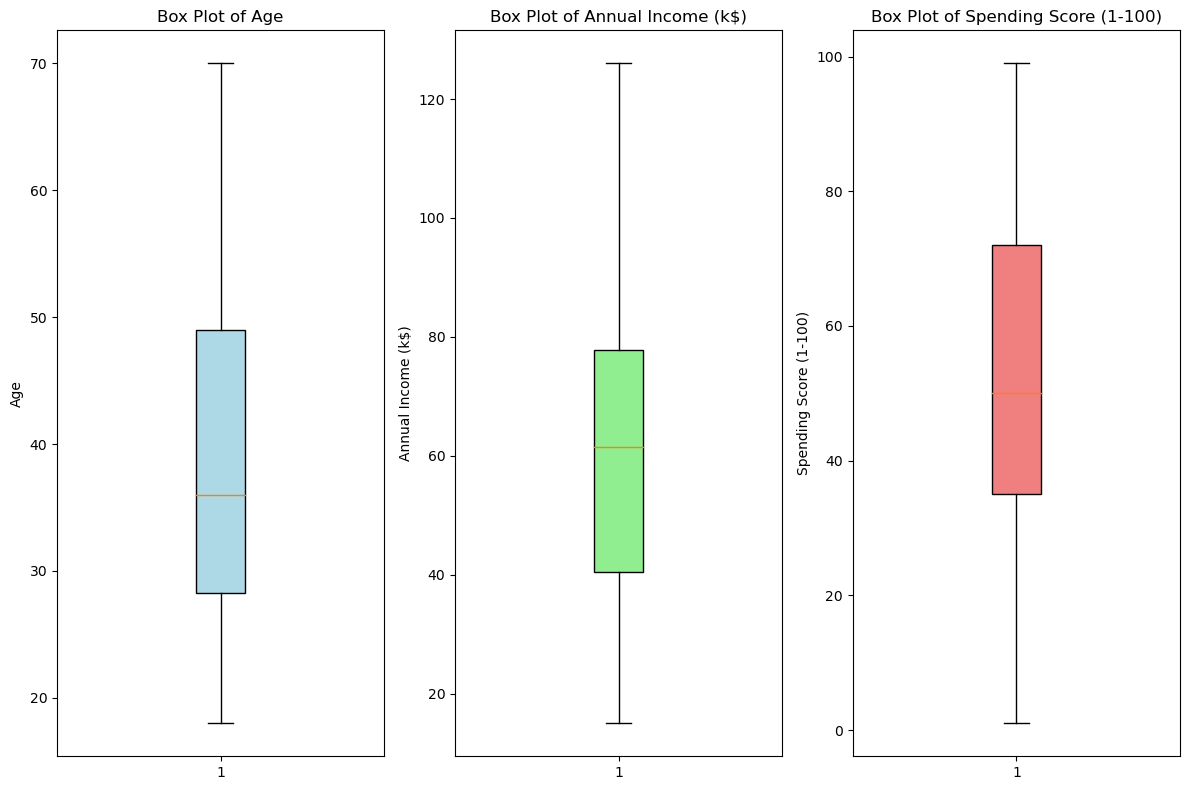

In [19]:
# Select only the numerical columns for outlier analysis
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Set up a color palette for the box plots
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
for idx, column in enumerate(numerical_columns):
    plt.subplot(1, 3, idx + 1)
    plt.boxplot(data[column], patch_artist=True, boxprops=dict(facecolor=colors[idx]))
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 201
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              198 non-null    int64  
 1   Gender                  198 non-null    object 
 2   Age                     198 non-null    float64
 3   Annual Income (k$)      198 non-null    float64
 4   Spending Score (1-100)  198 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.3+ KB
